In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Лінійна регресія

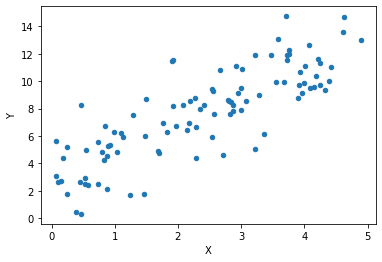

In [2]:
np.random.seed(10)
num_points = 100
k = 1.7
b = 3.5
noise = np.random.normal(0, 2, num_points)
X = np.random.uniform(0, 5, num_points)
Y = k * X + b + noise
plt.scatter(X,Y, 20)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [3]:
x_train, y_train = X, Y

In [4]:
lr = 0.005
k, b = 0, 0
epochs_n = 1000
mse = [100000]
for e in range(epochs_n):
    y_hat = k*x_train + b
    mse_error = 1/(2*num_points) * ((y_train - y_hat)**2).sum()
    k_grad= (-1/num_points) * (y_train - y_hat).sum()
    b_grad = (-1/num_points) * ((y_train - y_hat)*x_train).sum()
    if mse_error > mse[-1]:
        break
    mse.append(mse_error)
    k = k - lr*k_grad
    b = b - lr*b_grad
print(k, b)

1.3636375210579663 4.45914476684632


In [5]:
print(mse)

[100000, 34.90326871834044, 33.25484250175268, 31.68908289811, 30.201846610752177, 28.789198015947555, 27.447398753811196, 26.17289784095205, 24.96232227869897, 23.81246813206572, 22.72029205586053, 21.682903245528124, 20.697555791435583, 19.761641416380428, 18.872682577112897, 18.028325911627093, 17.226336014890236, 16.46458952654782, 15.741069514967775, 15.053860142770262, 14.401141599734412, 13.781185289680447, 13.19234925859719, 12.633073851923246, 12.10187758949607, 11.597353247258843, 11.118164135361985, 10.663040562815468, 10.230776479341579, 9.820226285546369, 9.4303018029733, 9.05996939602529, 8.708247238143253, 8.374202715010552, 8.056949957915329, 7.7556475007468535, 7.469496054429067, 7.197736392905052, 6.93964734508125, 6.694543887420407, 6.461775332138565, 6.2407236062140905, 6.030801616657101, 5.831451697715634, 5.642144135911746, 5.462375769006457, 5.29166865518809, 5.129568808964191, 4.975645000413716, 4.829487614623696, 4.690707568293776, 4.558935280643249, 4.43381969

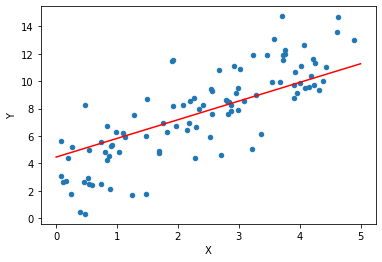

In [6]:
plt.scatter(X,Y, 20)
x = np.linspace(0, 5,100)
y = k*x + b
plt.plot(x,y, "r")
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Логістична регресія

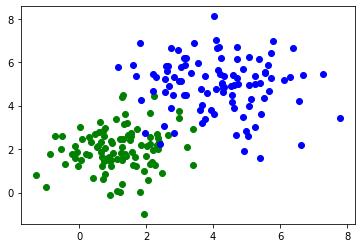

In [7]:
np.random.seed(10)
num_points = 100
mean_1 = [1, 2]
cov_1 = [[1, 0], [0, 1]]
mean_2 = [4, 5]
cov_2 = [[2, 0], [0, 2]]
x_1_train = np.random.multivariate_normal(mean_1, cov_1, num_points)
x_1_train = np.array(list(zip(x_1_train[:,0], x_1_train[:,1], [0 for i in range(num_points)])))
x_2_train = np.random.multivariate_normal(mean_2, cov_2, num_points)
x_2_train = np.array(list(zip(x_2_train[:,0], x_2_train[:,1], [1 for i in range(num_points)])))
plt.scatter(x_1_train[:,0], x_1_train[:,1], color="green")
plt.scatter(x_2_train[:,0], x_2_train[:,1], color="blue")
plt.show()

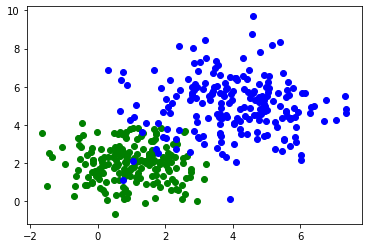

In [8]:
np.random.seed(11)
num_points = 200
x_1_test = np.random.multivariate_normal(mean_1, cov_1, num_points)
x_1_test = np.array(list(zip(x_1_test[:,0], x_1_test[:,1], [0 for i in range(num_points)])))
x_2_test = np.random.multivariate_normal(mean_2, cov_2, num_points)
x_2_test = np.array(list(zip(x_2_test[:,0], x_2_test[:,1], [1 for i in range(num_points)])))
plt.scatter(x_1_test[:,0], x_1_test[:,1], color="green")
plt.scatter(x_2_test[:,0], x_2_test[:,1], color="blue")
plt.show()

In [9]:
train_data = np.concatenate((x_1_train, x_2_train), axis = 0)
test_data = np.concatenate((x_1_test, x_2_test), axis = 0)

In [10]:
def sigmoid(z):
    return (1/(1+np.exp(-z)))


def loss(x, y, y_hat):
    return (-1/len(x)*((y*np.log(y_hat))-(np.ones(len(x))-y)*np.log(np.ones(len(x))-y_hat)).sum())


def gradient(x, y, y_hat):
    return (1/len(x)*np.dot(x.T, (y_hat - y)))


def gradient_b(x,y,y_hat):
    return (1/len(x))*np.sum((y_hat - y))


def predict(x, w, b):
    predictions = sigmoid(np.dot(x, w) + b)
    return [0 if i < 0.5 else 1 for i in predictions]

def train(w, b, epochs_n, lr, x, y):
    for e in range(epochs_n):
        y_hat = sigmoid(np.dot(x, w)+b)
        w_grad = gradient(x,y,y_hat)
        b_grad = gradient_b(x,y,y_hat)
        w -= lr*w_grad
        b -= lr*b_grad
    return w, b ,loss(x, y, y_hat)

In [11]:
w_list = []
b_list = []
losses = []
x = train_data[:,0:2]
y = train_data[:,2]

epochs_n = 1000
lr = 0.1
w, b, l = train([0,0], 0, epochs_n, lr, x, y)
losses.append(l)
w_list.append(w)
b_list.append(b)

epochs_n = 2000
lr = 0.1
w, b, l = train([0,0], 0, epochs_n, lr, x, y)
losses.append(l)
w_list.append(w)
b_list.append(b)

epochs_n = 1000
lr = 0.01
w, b, l = train([0,0], 0, epochs_n, lr, x, y)
losses.append(l)
w_list.append(w)
b_list.append(b)

epochs_n = 2000
lr = 0.01
w, b, l = train([0,0], 0, epochs_n, lr, x, y)
losses.append(l)
w_list.append(w)
b_list.append(b)

In [12]:
print(losses)

[-0.02889785815142645, -0.014089642419212964, -0.16523532162475793, -0.10910468832182676]


In [13]:
x = test_data[:,0:2]
y = test_data[:,2]
y_hat = predict(x, w_list[1], b_list[1])
accuracy = np.sum(y == y_hat) / len(y)
print(accuracy)

0.9525


In [14]:
print(w_list[1], b_list[1])

[1.31613562 1.09713626] -6.942306608945665


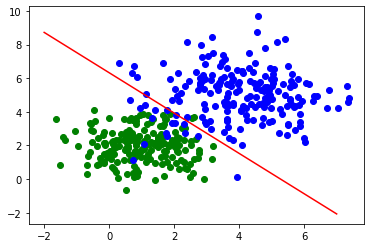

In [15]:
x =  np.linspace(-2,7,100)
h_x = (-w_list[1][0]/w_list[1][1])*x - b_list[1]/w_list[1][1] 
plt.scatter(x_1_test[:,0], x_1_test[:,1], color="green")
plt.scatter(x_2_test[:,0], x_2_test[:,1], color="blue")
plt.plot(x,h_x, "r")
plt.show()